In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt 

df = pd.read_csv('../data/processed/students_proc.csv', encoding='utf-8', index_col=False)

df['passou'] = ((df['attendance_rate'] > 10) & (df['final_grade'] > 1) & (df['homework_completion'] == 0)).astype(int)

X = df[['attendance_rate', 'homework_completion', 'final_grade']]
y = df['passou']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

modelo = LogisticRegression()
modelo.fit(X_train_scaled, y_train)

y_pred = modelo.predict(X_test_scaled)

print("\nAcurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))



Acurácia: 0.985

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99       109
           1       0.97      1.00      0.98        91

    accuracy                           0.98       200
   macro avg       0.98      0.99      0.98       200
weighted avg       0.99      0.98      0.99       200



<Axes: xlabel='passou'>

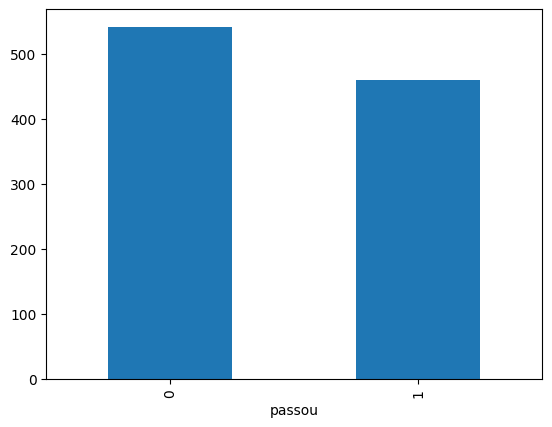

In [2]:
# distribution to check if the 'passou' column is 1 or 0

df['passou'].value_counts()

#plot to check if the 'passou' column is 1 or 0

df['passou'].value_counts().plot(kind='bar')